In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<font color='purple'>
      
      
# Content:
1. [LOAD and FIRST LOOK to DATA](#1)
1. [VARIABLE DESCRIPTION](#2)
1. [STATISTICS](#3)
    * [HISTOGRAMS](#4)
    * [SUMMARY STATISTICS](#5)
        * [MEAN (AVERAGE)](#6)
        * [MEDIAN](#7)
        * [QUANTILE](#8)
            * [OUTLIERS](#9)
            * [VISUALIZE OUTLIERS (BOX PLOT)](#10)
        * [MODE](#11)
        * [VARIANCE](#12)
        * [STANDARD DEVIATION](#13)
1. [RELATIONSHIP BETWEEN VARIABLES](#14)
     * [CORRELATION](#15)
     * [VISUALIZE CORRELATION (HEAT MAP)](#16)
     * [COVARIANCE](#17)
     * [PEARSON'S CORRELATION](#18)
     * [SPEARSMAN'S RANK CORRELATION](#19)
1. [PROBABILITY](#20)
    * [CUMULATIVE DISTRIBUTION FUNCTION (CDF)](#21)
1. [STATISTICAL HYPOTHESIS TESTING](#22)
    * [ONE SAMPLE T TEST](#23)
    * [SHAPIRO - WILK TEST](#24)
    * [HOMOGENEITY OF VARIANCE](#25)
    * [TWO-SAMPLE T-TEST / INDEPENDENT SAMPLES T-TEST](#26)
    * [DEPENDENT T-TEST / PAIRED T-TEST / PAIRED-SAMPLES T-TEST](#27)
    * [ANALYSIS of CATEGORICAL VARIABLES](#28)
        

<a id="1"></a>


# LOAD and FIRST LOOK to DATA

In [ ]:
data=pd.read_csv("../input/pokemon-challenge/pokemon.csv")
data=data.drop(columns="#",axis=0)
data.head()

In [ ]:
data.info()

<a id="2"></a>

# VARIABLE DESCRIPTION

In [ ]:
data.columns

<a id="3"></a>


# STATISTICS

<a id="4"></a>


## HISTOGRAMS

One of the best ways to describe a variable is to report the values that appear
in the dataset and how many times each value appears.


This description is called the **distribution** of the variable.


The most common representation of a distribution is a *histogram*, which is a
graph that shows the **frequency** of each value.

In [ ]:
sns.histplot(data=data,x="Defense");

* **Normal Distribution:** An idealization of a bell-shaped distribution : Gaussian Distribution.

* **Uniform Distribution:** A distribution in which all values have the same frequency.

In [ ]:
sns.distplot(data.Attack)

In [ ]:
sns.histplot(data=data,x="Generation")

In [ ]:
sns.histplot(data=data,x="Speed",hue="Type 2")

In [ ]:
sns.histplot(data=data,x="Speed",hue="Type 1")

Looking at histograms, it is easy to identify the most common values and
the shape of the distribution, but rare values are not always visible.

<a id="5"></a>


## SUMMARY STATISTICS

<a id="6"></a>

### MEAN (AVERAGE)

Let's say we have sample of **n** values: **x**

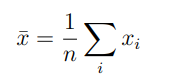

In [ ]:
print("Mean of Speed: ",data.Speed.mean())
print("Mean of Attack: ",data.Attack.mean())

<a id="7"></a>


## MEDIAN


* Median is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).
* The median represents the value less than which 50% of the data lies.

In [ ]:
print("Median of Speed: ",data.Speed.median())
print("Median of Attack: ",data.Attack.median())

<a id="8"></a>


## QUANTILE

* A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies.


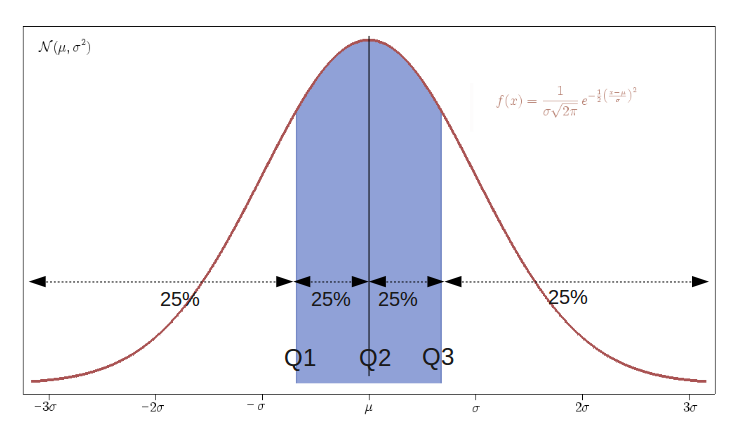

**First Quantile: (%25):**

The first quantile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set.

**Second Quantile : (%50) Median**

**Third Quantile: (%75):**

The third quantile (Q3) is the middle value between the median and the highest value (maximum) of the data set.

In [ ]:
q1=data.Speed.quantile(0.25)
q2=data.Speed.quantile(0.50) # Median
q3=data.Speed.quantile(0.75)

print("First Quertile: ",q1)
print("Second Quertile (Median): ",q2)
print("Third Quertile: ",q3)


<a id="9"></a>

## OUTLIERS

Check for **outliers**, which are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.

The **Interquartile Range (IQR)** is a measure of statistical dispersion, which is the spread of the data: **Q3-Q1**

In [ ]:
Q1=data.Attack.quantile(0.25)
Q3=data.Attack.quantile(0.75)
IQR=Q3-Q1

print("First Quertile: ",Q1)
print("Third Quertile: ",Q3)
print("Inter Quertile: ",IQR)

<a id="10"></a>


### VISUALIZE OUTLIERS (BOX PLOT)

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=data)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
data.head()

In [ ]:
trace0 = go.Box(
    y=data.HP,
    name="HP",
    marker=dict(color="mediumpurple")
)
trace1 = go.Box(
    y=data.Attack,
    name="Attack",
    marker=dict(color="orangered")
)
trace2 = go.Box(
    y=data.Defense,
    name="Defense",
    marker=dict(color="chartreuse")
)
trace3 = go.Box(
    y=data.Speed,
    name="Speed",
    marker=dict(color="aqua")
)

d = [trace0,trace1,trace2,trace3]
iplot(d)

<a id="11"></a>


# MODE

 * Most- common value(s)

In [ ]:
print("Mode of Speed: ",data.Speed.mode())
print("Mode of Attack: ",data.Attack.mode())

<a id="12"></a>

## VARIANCE

* Spread distributions

In [ ]:
print("Variance of Speed: ",data.Speed.var())
print("Variance of Attack: ",data.Attack.var())

<a id="13"></a>


## STANDARD DEVIATION

Square root of variance

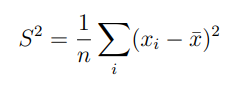

In [ ]:
print("Standard Deviation of Speed: ",data.Speed.std())
print("Standard Deviation of Attack: ",data.Attack.std())

In [ ]:
data.describe().T

<a id="14"></a>


# RELATIONSHIP BETWEEN VARIABLES

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(data.Speed,data.Attack,kind="reg")
plt.show()

<a id="15"></a>


# CORRELATION

* Strength of the relationship between two variables.

In [ ]:
data.corr() # Correlation between all variables.

* If the correlation value of two variable is 1: they are **positively correlated** with each other.
* If the correlation value of two variable is -1: they are **negatively correlated** with each other.
* If the correlation value of two variable is 0: there is **no correlation** between them.

#### Lets visualize it

<a id="16"></a>



## VISUALIZE CORRELATION (HEAT MAP)

In [ ]:
correlation=data.corr()

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, linewidths=0.5, fmt= '.2f',ax=ax,cmap="YlGnBu")
plt.show()

### Do not forget correlation is not causation. 😉😉😉

<a id="17"></a>


# COVARIANCE


* Measure of the tendency of two variables to vary together.

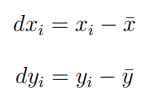



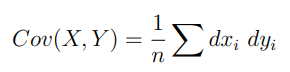


In [ ]:
np.cov(data.Speed,data.Attack)

print("Covariance between Speed and Attack : ",data.Speed.cov(data.Attack))

<a id="18"></a>


# PEARSON'S CORRELATION
* It is the ratio between the covariance of two variables and the product of their standard deviations.
* It is a measure of **linear correlation** between two sets of data.

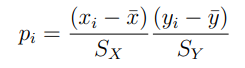

In [ ]:
p1=data.loc[:,["Speed","Attack"]].corr(method="pearson")
p2=data.Attack.cov(data.Speed)/(data.Attack.std()*data.Speed.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

* If Pearson’s correlation is near **0**, it is tempting to conclude that there is **no relationship** between the variables.
* That conclusion is not valid. Pearson’s correlation only measures linear relationships.

<a id="19"></a>


# SPEARSMAN'S RANK CORRELATION

* Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers.

* Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions.

* To compute Spearman’s correlation, we have to compute the **rank** of each value.

In [ ]:
data_rank=data.rank()
spearman_corelation=data_rank.loc[:,["Speed","Attack"]].corr(method="pearson")
print("Spearman's correlation: ")
print(spearman_corelation)

* If the relationship is nonlinear, Pearson’s correlation tends to underestimate the strength of the relationship, and 
* Pearson’s correlation can be affected (in either direction) if one of the distributions is skewed or contains outliers. Spearman’s rank correlation is more robust.

<a id="20"></a>


# PROBABILITY

<a id="21"></a>


## CUMULATIVE DISTRIBUTION FUNCTION (CDF)
* A CDF maps from values to cumulative probabilities.
* CDF gives the probability that a random variable is less than or equal to a certain value.

In [ ]:
from scipy.stats import norm
norm.cdf(100,68.2775,29.060473717161464) #(value?,mean,standard deviation)
# norm.cdf(100,data.Speed.mean(),data.Speed.std())

In [ ]:
plt.hist(data.Speed,bins=50,label='Speed',color="khaki",cumulative = True,density=True, stacked=True)
sorted_data = np.sort(data.Speed)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='orange')
plt.title('CDF of Speed')
plt.show()

* According to the graph : P(100<X) ?
* Answer is : 0.9
* This means the probability that the variable takes a values less than or equal to 100 (Speed) is 0.9.

<a id="22"></a>


# STATISTICAL HYPOTHESIS TESTING

* The goal of classical hypothesis testing is to answer the question, **“Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?”**

1. The first step is to quantify the size of the apparent effect by choosing a **test statistic**.

1. The second step is to define a **null hypothesis**, which is a model of the system based on the assumption that the apparent effect is not real. H0

1. The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true.

1. The last step is to interpret the result. If the p-value is low, the effect is said to be **statistically significant**, which means that it is unlikely to have occurred by chance.

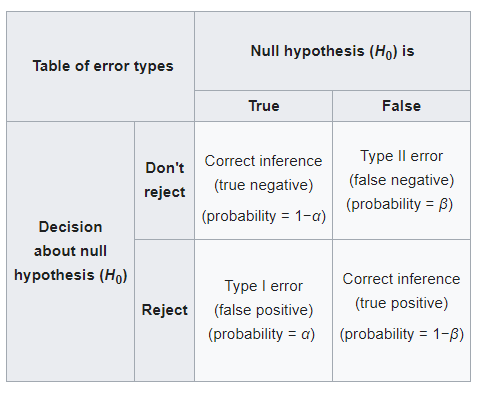

## z - TEST

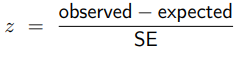

* SE= Standard Error

## t - TEST

* Small modification of z-test. (Sample size is small)

## P - VALUE

* A statistical measurement used to validate a hypothesis against observed data.

* Reject H0:
    * If p value > 0.10 → “Not Significant”
    * If p value ≤ 0.10 → “Marginally Significant”
    * If p value ≤ 0.05 → “Significant”
    * If p value ≤ 0.01 → “Highly Significant.”

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
statistic, p_value = ttest_rel(data.HP,data.Defense)
print('p-value: ',p_value)

In [ ]:
p_value<0.05

##### P-Value is smaller than 0.05. So H0 is rejected.

<a id="23"></a>


# ONE SAMPLE T TEST

* The One Sample t Test examines whether the mean of a population is statistically different from a known or hypothesized value.

In [ ]:
import scipy.stats as stats

In [ ]:
stats.describe(data.HP)

In [ ]:
import pylab
stats.probplot(data.HP,dist="norm",plot=pylab)
pylab.show()

<a id="24"></a>

# SHAPIRO - WILK TEST

* H0: Population is normally distributed.
* H1: Population is not normally distributed.

In [ ]:
from scipy.stats import shapiro
shapiro(data.HP)

print("T Test Statistics: ",shapiro(data.HP)[0])
print("P Value : ",shapiro(data.HP)[1])

In [ ]:
1.1518300198312678e-20<0.05

##### P-Value is smaller than 0.05. H0 is rejected.

<a id="25"></a>


# HOMOGENEITY OF VARIANCE

* The assumption of homogeneity of variance is an assumption of the independent samples t-test stating that all comparison groups have the same variance.

* H0: Variances are homogeneous
* H1: Variances are not homogeneous

In [ ]:
stats.levene(data["Speed"],data["Attack"])

In [ ]:
0.04306159762659687<0.05

##### p- value < 0.05 So H0 is rejected. They are not homogeneous.

<a id="26"></a>


# TWO-SAMPLE T-TEST / INDEPENDENT SAMPLES T-TEST


* Two-sample t-test is used to test whether the unknown population means of two groups are equal or not.


* H0: Means are equal
* H1: Means are not equal

In [ ]:
stats.ttest_ind(data["Speed"],data["Attack"],equal_var=False)
# equal_var=False Because homogeneity of variance is not provided

In [ ]:
4.897628155049799e-12<0.05

##### p-value < 0.05 So H0 is rejected.

<a id="27"></a>




# DEPENDENT T-TEST / PAIRED T-TEST / PAIRED-SAMPLES T-TEST

* Compares the means of two related groups to determine whether there is a statistically significant difference between these means.

* H0: Means are equal
* H1: Means are not equal

In [ ]:
tTestResult,p_value=stats.ttest_rel(data.Attack,data.Defense)
print("t-Test Result= %.5f , P-Value= %.5f" % (tTestResult,p_value))

In [ ]:
p_value<0.05

##### p_value<0.05 So H0 is rejected.

<a id="28"></a>


# ANALYSIS of CATEGORICAL VARIABLES

## CHI - SQUARE TEST

* Chi - Square is a test for independence between categorical variables.

* H0: The two categorical variables have no relationship
* H1: There is a relationship between two categorical variables

In [ ]:
from scipy.stats import chi2_contingency

### CONTINGENCY TABLE

* Displays the (multivariate) frequency distribution of the variables.

In [ ]:
contingency=pd.crosstab(data["Legendary"],data["Type 1"])
contingency.head()

In [ ]:
stat, p_value, dof, expected =chi2_contingency(contingency)
print("P-Value= %.10f" % (p_value))

#### P-Value < 0.05 So H0 is rejected. There is relation between variables.